# Titanic survial predictor model using tensorflow based on label `Survived`

Importing libiraries 

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

2022-09-22 19:22:53.589671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 19:22:53.589835: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**Data preparation** get the data with `pandas` and split it with `sklearn` into `training data` and `testing data`

In [3]:
data = pd.read_csv('./data.csv')
data = data.drop(['PassengerId', 'Ticket', 'Name','Cabin', 'Embarked'], axis=1)
data = pd.get_dummies(data)
data = data.dropna(axis=0)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


**Exploring the data**

* Features relationship

> Two factors majorly affect survival change, `Being a Female` and `Fare Price`

<AxesSubplot:>

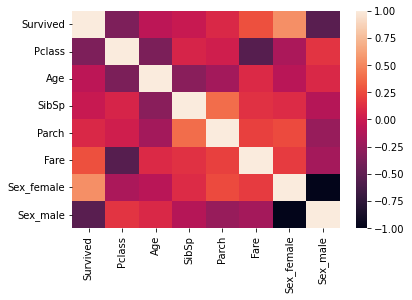

In [4]:
sns.heatmap(data.corr())

**Generate our model**
* 2 hidden layers with 4 hidden units each
* relu activation for the hidden and sigmoid for the output neuron
* BinaryCrossentropy as a loss function
* Adam as an optimizer
* Accuracy as a metric

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=250)

2022-09-22 19:23:29.174316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-22 19:23:29.174384: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-22 19:23:29.174441: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (george-HP-Pavilion-15-Notebook-PC): /proc/driver/nvidia/version does not exist
2022-09-22 19:23:29.174812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/250
15/15 [==============================] - 3s 12ms/step - loss: 0.7510 - accuracy: 0.4791
Epoch 2/250
15/15 [==============================] - 0s 14ms/step - loss: 0.6878 - accuracy: 0.5879
Epoch 3/250
15/15 [==============================] - 0s 10ms/step - loss: 0.6787 - accuracy: 0.6004
Epoch 4/250
15/15 [==============================] - 0s 15ms/step - loss: 0.6711 - accuracy: 0.6025
Epoch 5/250
15/15 [==============================] - 0s 9ms/step - loss: 0.6622 - accuracy: 0.6339
Epoch 6/250
15/15 [==============================] - 0s 11ms/step - loss: 0.6134 - accuracy: 0.6736
Epoch 7/250
15/15 [==============================] - 0s 16ms/step - loss: 0.6069 - accuracy: 0.6820
Epoch 8/250
15/15 [==============================] - 0s 22ms/step - loss: 0.5923 - accuracy: 0.6695
Epoch 9/250
15/15 [==============================] - 0s 13ms/step - loss: 0.5826 - accuracy: 0.6715
Epoch 10/250
15/15 [==============================] - 0s 15ms/step - loss: 0.5745 - accuracy: 0.6736


In [6]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 6ms/step - loss: 0.5897 - accuracy: 0.7966


[0.5896580219268799, 0.7966101765632629]

Great! now we reatched 79% accuracy!

Let's save it as h5

In [7]:
model.save('titanic-survival-predictor.h5')